# 第3讲 网络爬虫技术

## 3.1 模块要求

- urllib —— python 内置（略）
- requests —— 第三方库（强大）
- bs4.BeautifulSoup —— 处理网页数据

- 关于requests  
- 将很多http封装起来  
https://2.python-requests.org/zh_CN/latest/

- 关于BeautifulSoup  
https://www.crummy.com/software/BeautifulSoup

In [1]:
import requests
from bs4 import BeautifulSoup

import time
import random

## 3.2 常规步骤

- 熟悉目标网页
    - 网址
    - 内容格式
    - 编码
    - 其它
    
    
- 导入模块 （requests、BeautifulSoup）

- 访问 —— 调用 `requests.get` 函数

- 查询结果代码

- 获取内容并处理

## 3.3 示范

### 3.3.1 简单的爬虫demo

- 特别提示
    - 课程学习示范，不可用于批量下载，否则责任自负

In [2]:
# coding:utf-8

from bs4 import BeautifulSoup
import requests

# 先分析网页代码
url = 'http://python123.io/ws/demo.html'
r = requests.get(url)
demo = r.text  # 服务器返回响应

In [3]:
demo

'<html><head><title>This is a python demo page</title></head>\r\n<body>\r\n<p class="title"><b>The demo python introduces several python courses.</b></p>\r\n<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n<a href="http://www.icourse163.org/course/BIT-268001" class="py1" id="link1">Basic Python</a> and <a href="http://www.icourse163.org/course/BIT-1001870001" class="py2" id="link2">Advanced Python</a>.</p>\r\n</body></html>'

In [4]:
soup = BeautifulSoup(demo, "html.parser")
#"""
#demo 表示被解析的html格式的内容
#html.parser表示解析用的解析器
#"""

print(soup.prettify())  # 使用prettify()格式化显示输出

<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>


- 得到一个BeautifulSoup对象后，一般通过BeautifulSoup类的基本元素来提取html中的内容
<img src = "images\ch03\ch03-01.png">

- 提取html中的信息

In [37]:
print(soup)  # 输出相应的html对象

<html><head><title>This is a python demo page</title></head>
<body>
<p class="title"><b>The demo python introduces several python courses.</b></p>
<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>
</body></html>


In [38]:
print(soup.get_text())

This is a python demo page

The demo python introduces several python courses.
Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
Basic Python and Advanced Python.



In [5]:
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_check_markup_is_url',
 '_feed',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_most_recent_element',
 '_namespaces',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'attrs',
 'builder',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'children',
 'cl

In [40]:
type(soup.a)

bs4.element.Tag

In [41]:
print(soup.title)  # 获取html的title标签的信息
print(soup.a)  # 获取html的a标签的信息(soup.a默认获取第一个a标签，想获取全部就用for循环去遍历)
print(soup.a.name)   # 获取a标签的名字
print(soup.a.parent.name)   # a标签的父标签(上一级标签)的名字
print(soup.a.parent.parent.name)  # a标签的父标签的父标签的名字

<title>This is a python demo page</title>
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>
a
p
body


In [13]:
print('a标签类型是：', type(soup.a))   # 查看a标签的类型
print('第一个a标签的属性是：', soup.a.attrs)  # 获取a标签的所有属性(注意到格式是字典)
print('a标签属性的类型是：', type(soup.a.attrs))  # 查看a标签属性的类型
print('a标签的class属性是：', soup.a.attrs['class'])   # 因为是字典，通过字典的方式获取a标签的class属性
print('a标签的href属性是：', soup.a.attrs['href'])   # 同样，通过字典的方式获取a标签的href属性

a标签类型是： <class 'bs4.element.Tag'>
第一个a标签的属性是： {'href': 'http://www.icourse163.org/course/BIT-268001', 'class': ['py1'], 'id': 'link1'}
a标签属性的类型是： <class 'dict'>
a标签的class属性是： ['py1']
a标签的href属性是： http://www.icourse163.org/course/BIT-268001


In [14]:
print('第一个a标签的内容是：', soup.a.string)  # a标签的非属性字符串信息，表示尖括号之间的那部分字符串
print('a标签的非属性字符串的类型是：', type(soup.a.string))  # 查看标签string字符串的类型
print('第一个p标签的内容是：', soup.p.string)  # p标签的字符串信息(注意p标签中还有个b标签，但是打印string时并未打印b标签，说明string类型是可跨越多个标签层次)

第一个a标签的内容是： Basic Python
a标签的非属性字符串的类型是： <class 'bs4.element.NavigableString'>
第一个p标签的内容是： The demo python introduces several python courses.


介绍一下find_all()方法：

常用通过find_all()方法来查找标签元素：<>.find_all(name, attrs, recursive, string, **kwargs) ，返回一个列表类型，存储查找的结果 

• name：对标签名称的检索字符串  
• attrs：对标签属性值的检索字符串，可标注属性检索  
• recursive：是否对子孙全部检索，默认True  
• string：<>…</>中字符串区域的检索字符串   

In [42]:
print('所有a标签的内容：\n', soup.find_all('a')) # 使用find_all()方法通过标签名称查找a标签,返回的是一个列表类型
print("*"*60)
print('a标签和b标签的内容：\n', soup.find_all(['a', 'b']))  # 把a标签和b标签作为一个列表传递，可以一次找到a标签和b标签

所有a标签的内容：
 [<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>, <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]
************************************************************
a标签和b标签的内容：
 [<b>The demo python introduces several python courses.</b>, <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>, <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]


In [43]:
for t in soup.find_all('a'):  # for循环遍历所有a标签，并把返回列表中的内容赋给t
    print('*'*60)
    print('t的值是：', t)  # link得到的是标签对象
    print('t的类型是：', type(t))
    print('a标签中的href属性是：', t.get('href'))  # 获取a标签中的url链接

************************************************************
t的值是： <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>
t的类型是： <class 'bs4.element.Tag'>
a标签中的href属性是： http://www.icourse163.org/course/BIT-268001
************************************************************
t的值是： <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>
t的类型是： <class 'bs4.element.Tag'>
a标签中的href属性是： http://www.icourse163.org/course/BIT-1001870001


In [44]:
for i in soup.find_all(True):  # 如果给出的标签名称是True，则找到所有标签
    print('标签名称：', i.name)  # 打印标签名称

标签名称： html
标签名称： head
标签名称： title
标签名称： body
标签名称： p
标签名称： b
标签名称： p
标签名称： a
标签名称： a


In [45]:
print('href属性为http..的a标签元素是:', soup.find_all('a', href='http://www.icourse163.org/course/BIT-268001'))  # 标注属性检索
print('class属性为title的标签元素是：', soup.find_all(class_='title'))  # 指定属性，查找class属性为title的标签元素，注意因为class是python的关键字，所以这里需要加个下划线'_'
print('id属性为link1的标签元素是：', soup.find_all(id='link1'))  # 查找id属性为link1的标签元素

href属性为http..的a标签元素是: [<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>]
class属性为title的标签元素是： [<p class="title"><b>The demo python introduces several python courses.</b></p>]
id属性为link1的标签元素是： [<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>]


In [46]:
print(soup.head)  # head标签
print('*'*60)
print(soup.head.contents)   # head标签的儿子标签，contents返回的是列表类型
print('*'*60)
print(soup.body.contents)   # body标签的儿子标签
"""对于一个标签的儿子节点，不仅包括标签节点，也包括字符串节点，比如返回结果中的 \n"""

<head><title>This is a python demo page</title></head>
************************************************************
[<title>This is a python demo page</title>]
************************************************************
['\n', <p class="title"><b>The demo python introduces several python courses.</b></p>, '\n', <p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>, '\n']


'对于一个标签的儿子节点，不仅包括标签节点，也包括字符串节点，比如返回结果中的 \n'

In [47]:
print(len(soup.body.contents))  # 获得body标签儿子节点的数量
print(soup.body.contents[1])   # 通过列表索引获取第一个节点的内容

5
<p class="title"><b>The demo python introduces several python courses.</b></p>


In [48]:
print(type(soup.body.children))  # children返回的是一个迭代对象，只能通过for循环来使用，不能直接通过索引来读取其中的内容
for i in soup.body.children:   # 通过for循环遍历body标签的儿子节点
    print(i.name)   # 打印节点的名字

<class 'list_iterator'>
None
p
None
p
None


### 3.3.2 豆瓣 —— 查看豆瓣电影数据(完整版)

- 特别提示
    - 课程学习示范，不可用于批量下载，否则责任自负

https://movie.douban.com/top250?start=0&filter=   
https://movie.douban.com/top250?start=25&filter=

In [51]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  9 09:01:51 2021

@author: rjma
"""
import requests
from bs4 import BeautifulSoup
import time
import random
import re
import pandas as pd
import matplotlib.pyplot as plt

class Douban:
    def __init__(self):
        self.URL = "https://movie.douban.com/top250"
        self.startnum = [i for i in range(0, 251, 25)]
        # 伪装一个浏览器，消息头
        self.header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}
    
    def get_top250(self):
        self.number_evaluate = []
        self.score = []
        self.movie_name = []
        for start in self.startnum:
            #print("*"*60)
            time.sleep(random.randint(1,5))  # 伪装成人为随机时间点击
            html = requests.get(self.URL, params = {"start": str(start)}, headers = self.header)
            soup = BeautifulSoup(html.text, "html.parser")

            #content > div > div.article > ol > li > div > div.info > div.hd > a > span:nth-child(1)
            
            # selector copying ,从上到小的
            #content > div > div.article > ol > li:nth-child(1) > div > div.info > div.hd > a > span:nth-child(2)  
            #content > div > div.article > ol > li:nth-child(1) > div > div.info > div.bd > div > span.rating_num
            
            #scores = soup.select('#content > div > div.article > ol > li:nth-child(1) > div > div.info > div.bd > div > span.rating_num')
            #movie_names = soup.select('#content > div > div.article > ol > li:nth-child(1) > div > div.info > div.hd > a > span:nth-child(1)')
            #number_evaluate = soup.select('#content > div > div.article > ol > li:nth-child(1) > div > div.info > div.bd > div > span:nth-child(4)')
            scores = soup.select('#content > div > div.article > ol > li > div > div.info > div.bd > div > span.rating_num')
            movie_names = soup.select('#content > div > div.article > ol > li > div > div.info > div.hd > a > span:nth-child(1)')
            number_evaluate = soup.select('#content > div > div.article > ol > li > div > div.info > div.bd > div > span:nth-child(4)')
            for scorei in scores:
                self.score.append(float(scorei.text))
            
            for movename in movie_names:
                #print(movename)
                self.movie_name.append(movename.text)
            
            for namei in number_evaluate:
                #print(type(namei))
                #print(namei)
                self.number_evaluate.append(int(namei.text[:-3]))
         
        print(self.number_evaluate)
        print(self.movie_name)
        print(self.score)
        self.result = pd.DataFrame(zip(self.movie_name, self.number_evaluate, self.score))
        # 没有返回结果

    def print_result(self):
        #print('*'*60)
        pd.set_option('display.max_rows', None) # 显示pandas所有行
        return self.result
        #返回一个结果
    
    
    pass

if __name__ == '__main__':
    cls = Douban()
    cls.get_top250()
    cls.print_result()
    

[2297144, 1703997, 1727469, 1908060, 1689437, 1066002, 1806690, 881566, 1674069, 1147849, 1345994, 1259637, 1360782, 1527633, 1076069, 1058924, 1232279, 1489306, 1019474, 749777, 749881, 1227118, 1023546, 1445902, 352304, 797009, 834554, 634402, 648639, 1265088, 798425, 551657, 606364, 846692, 1070942, 1264040, 524816, 1123389, 368840, 793849, 493545, 672659, 979879, 1681936, 779338, 682064, 512729, 487620, 698963, 326995, 688255, 420056, 658137, 554001, 436772, 554555, 637657, 621165, 466819, 606177, 1290419, 450365, 1240549, 484933, 786173, 352963, 464579, 960880, 779172, 515804, 407667, 322924, 477804, 720183, 305099, 331637, 687255, 679835, 755626, 662777, 744020, 560119, 774374, 708292, 498306, 619061, 229279, 588149, 1044415, 763547, 637460, 879334, 539004, 698358, 481129, 295991, 533443, 832704, 584963, 334656, 430753, 431953, 338295, 438548, 496835, 633285, 836361, 386238, 492092, 303587, 474946, 283749, 718656, 572297, 452107, 802955, 368413, 585971, 802122, 128621, 230084, 41

In [ ]:
cls = Douban()
cls.get_top250()

In [98]:
result = cls.print_result()
result.columns = ["影片名称", "评价人数", "评分"]
result

************************************************************


,影片名称,评价人数,评分
0,肖申克的救赎,2267511,9.7
1,霸王别姬,1683495,9.6
2,阿甘正传,1707251,9.5
3,这个杀手不太冷,1890551,9.4
4,泰坦尼克号,1666045,9.4
5,美丽人生,1054988,9.5
6,千与千寻,1784820,9.4
7,辛德勒的名单,871626,9.5
8,盗梦空间,1656065,9.3
9,忠犬八公的故事,1133886,9.4


Text(0, 0.5, 'Score')

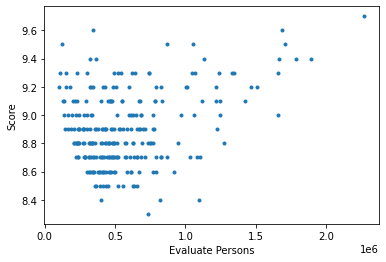

In [111]:
import matplotlib.pyplot as plt
plt.plot(result["评价人数"], result["评分"],'.')
plt.xlabel("Evaluate Persons")
plt.ylabel("Score")

- get请求使用了headers参数，这个是用来模拟浏览器的。
- 如何知道‘User-Agent’是什么呢？
- 在你的Chrome浏览器中，按F12，然后刷新网页，看下图就可以找到啦。

<img src = "images\ch03\ch03-02.jpg" width=800>

### 3.3.3 知网 —— 查找论文条目

- 特别提示
    - 课程学习示范，不可用于批量下载，否则责任自负

### 例 1 网络文献检索

- 关注机器学习与大数据方面的最新研究动向

### 步骤 1 —— 确定目标

- 普通访问
    - [http://search.cnki.net/search.aspx](http://search.cnki.net/search.aspx)
    - http://search.cnki.com.cn/Search/Result?content=%u673A%u5668%u5B66%u4E60%20%u5927%u6570%u636E
    
- 关键词组
    - 机器学习
    - 大数据

### 步骤 2 —— 获取网址

In [52]:
url = "http://search.cnki.com.cn/Search/Result?content=机器学习 大数据"

### 步骤 3 —— 访问网页，得到响应字符串

In [53]:
#sleeptime=random.randint(0, 180)    # 随机等待一段时间
#time.sleep(sleeptime)

print("OK!")

response_string = requests.get(url)

OK!


### 步骤 4 —— 查询响应代码

- 200 表示访问成功

In [54]:
# 响应代码，200 表示成功
response_code = response_string.status_code
response_code

200

In [30]:
response_string

<Response [200]>

### 步骤 5 —— 获得内容

- 注意汉字编码问题

In [55]:
content = BeautifulSoup(response_string.content.decode("utf-8"), "lxml")


### 步骤 6 —— 处理内容

- 输出，或其它

In [56]:
print(content.text)







综合搜索_知网空间



































搜索












 全  文 







从

不  限



不  限
1915年
1949年
1979年



到

不  限



不  限
1979年
1949年
1915年




全  文
主  题
篇  名
关键词
作  者
作者单位
摘  要
参考文献
基  金
文献来源
发表时间
中图分类号



搜索
快捷搜索













全  文







从不  限

不  限
1915年
1949年
1979年



到不  限

不  限
1979年
1949年
1915年




全  文
主  题
篇  名
关键词
作  者
作者单位
摘  要
参考文献
基  金
文献来源
发表时间
中图分类号



搜索
快捷搜索






设置


关闭历史记录
打开历史纪录
清除历史记录















引用



筛选：

文献类型
文献类型



学科分类
学科分类



发表年度
发表年度



作者
作者



机构
机构



基金
基金



研究层次
研究层次


















已选：


排序：

按相关度排序

按相关度排序
按发表时间排序
按下载次数排序
按被引次数排序




显示：



CNKI为你找到相关结果条












智能电网大数据技术发展研究  CNKI文献


智能电网是大数据最重要的应用领域之一。该文阐述了智能电网大数据的基本概念,包括:数据源及数据特征,大数据应用于智能电网的价值体现,大数据与传统研究方法的不同之处;综述了国内外智能电...


张东霞
苗新...


《中国电机工程学报》


2015年01期

期刊



                    关键词：
                    大数据
                        /
                    智能电网
                        /
                    理论基础
                        /
                    技术体系

下载（38297

### 步骤 7 —— 处理、分析等

- 问题1 —— 根据需求与可能性，思考一下，如何对检索到的内容进行处理？

In [57]:
records_titles = content.select('#article_result > div > div > p.tit.clearfix > a:nth-child(2)')
# #article_result > div > div:nth-child(1) > p.tit.clearfix > a:nth-child(2)
records_authors = content.select('#article_result > div > div > p.source > span:nth-child(1)')
# #article_result > div > div:nth-child(1) > p.source > span:nth-child(1)
records_journal = content.select('#article_result > div > div > p.source > a:nth-child(2) > span')
records_date = content.select('#article_result > div > div > p.source > a:nth-child(3) > span')

titles, authors, journal, date = [], [], [], []
for each in records_date:
    date.append(each.text)

for each in records_journal:
    journal.append(each["title"])

for each in records_authors:
    authors.append(each["title"])
    
for each in records_titles:
    titles.append(each["title"])

for t,a,j,d in zip(titles, authors, journal, date):
    print(t,", ",a,", ",j,", ",d)

智能电网大数据技术发展研究 ,  张东霞;苗新;刘丽平;张焰;刘科研 ,  中国电机工程学报 ,  2015年01期
基于粒计算的大数据处理 ,  徐计;王国胤;于洪 ,  计算机学报 ,  2015年08期
面向智能电网应用的电力大数据关键技术 ,  彭小圣;邓迪元;程时杰;文劲宇;李朝晖;牛林 ,  中国电机工程学报 ,  2015年03期
大数据系统和分析技术综述 ,  程学旗;靳小龙;王元卓;郭嘉丰;张铁赢;李国杰 ,  软件学报 ,  2014年09期
大数据相关分析综述 ,  梁吉业;冯晨娇;宋鹏 ,  计算机学报 ,  2016年01期
大数据:内涵、技术体系与展望 ,  彭宇;庞景月;刘大同;彭喜元 ,  电子测量与仪器学报 ,  2015年04期
发展教育大数据:内涵、价值和挑战 ,  杨现民;唐斯斯;李冀红 ,  现代远程教育研究 ,  2016年01期
智能配用电大数据需求分析与应用研究 ,  王继业;季知祥;史梦洁;黄复鹏;朱朝阳;张东霞 ,  中国电机工程学报 ,  2015年08期
大数据驱动的管理与决策前沿课题 ,  徐宗本;冯芷艳;郭迅华;曾大军;陈国青 ,  管理世界 ,  2014年11期
大数据分析与情报分析关系辨析 ,  李广建;化柏林 ,  中国图书馆学报 ,  2014年05期
大数据隐私管理 ,  孟小峰;张啸剑 ,  计算机研究与发展 ,  2015年02期
大数据时代数据犯罪的制裁思路 ,  于志刚;李源粒 ,  中国社会科学 ,  2014年10期
电力用户侧大数据分析与并行负荷预测 ,  王德文;孙志伟 ,  中国电机工程学报 ,  2015年03期
数据管理系统评测基准:从传统数据库到新兴大数据 ,  金澈清;钱卫宁;周敏奇;周傲英 ,  计算机学报 ,  2015年01期
大数据中的管理问题:基于大数据的资源观 ,  杨善林;周开乐 ,  管理科学学报 ,  2015年05期
电力大数据技术与电力系统仿真计算结合问题研究 ,  黄彦浩;于之虹;谢昶;史东宇;周孝信 ,  中国电机工程学报 ,  2015年01期
大数据系统综述 ,  李学龙;龚海刚 ,  中国科学:信息科学 ,  2015年01期
大数据流式计算:关键技术及系统实例 ,  孙大为;张广艳;郑纬民 ,  软件学报 ,  2014年04期
教育虚

### 步骤 8 —— 功能改进


- 问题2 —— 改进上述知网查找的结果顺序，根据以下不同属性排序
    - 被引次数
    - 下载次数
    - 时间
    - 下一页？

### 3.3.4 凤凰网 —— 股票信息抓取

### 例 2 有色金属行业板块资金流向数据获取


- 正常网址
    - [凤凰网沪深A股](http://app.finance.ifeng.com/list/stock.php?t=hs)


- 数据网址 —— 分析网页源代码得到



In [58]:
from bs4 import BeautifulSoup
import traceback
import re
import requests
import pandas as pd

def get_HTML_text(url, num, code='utf-8'):
    """
    获取股票网页信息，对网页编码进行默认赋值
    :param code: 默认的网页编码
    :param url: 股票信息的网址
    :param num: 股票信息总页数
    :return: 股票页面的信息文本
    """
    kv = {'p': num}
    try:
        r = requests.get(url, params=kv)
        
        r.encoding = code
        return r.text
    except:
        return ""

def get_stock_info(stockurl, fpath):
    """
    解析股票信息，并保存到文件中，增加进度条显示
    :param stockurl: 股票信息的网址
    :param fpath: 保存的文件路径
    :return: 空
    """
    count = 0
    stock_count = 0
    for i in range(1, 2): #50/page 3750/50=75   #76 =2
        html = get_HTML_text(stockurl, i)
        soup = BeautifulSoup(html, 'html.parser')
        tr = soup.find_all('tr')
        # pprint.pprint(tr[1].contents)
        try:
            # 先获取文件的表头信息
            if i == 1:
                head_list = []
                for head in tr[0].contents:
                    if head == '\n':
                        continue
                    head_list.append(head.string)
                with open(fpath, 'a', encoding='utf-8') as f:
                    f.write(str(head_list) + '\n')

            # 获取股票的个股信息，去掉表头和页面信息
            for r in tr[1:-1]:
                info_list = []
                # 通过tr标签的子节点获取股票信息，需要考虑换行符、文本字符等情况，增加进度条显示
                for info in r.contents:
                    if info == '\n':
                        continue
                    if r.contents.index(info) == 1:
                        href = info.contents[0].attrs['href']
                        info_list.append(re.findall(r'[s][hz]\d{6}', href)[0])
                    else:
                        info_list.append(info.string)
                with open(fpath, 'a', encoding='utf-8') as f:  #写入文件
                    f.write(str(info_list) + '\n')
                    stock_count += 1
            count += 1
            print('\r当前进度：{:.2f}%'.format(count * 100 / 75), end="")
        except:
            # 如果出现错误，打印详细错误信息，增加进度条显示
            traceback.print_exc()
            count += 1
            print('\r当前进度：{:.2f}%'.format(count * 100 / 75), end="")
            continue
    print('\n股票总数是：', stock_count)

def main():
    stock_info_url = 'http://app.finance.ifeng.com/list/stock.php?t=hs'
    # http://app.finance.ifeng.com/list/stock.php?t=hs&f=chg_pct&o=desc&p=3
    output_file = 'Web_Spider/stockinfo.txt'
    get_stock_info(stock_info_url, output_file)

main()

当前进度：1.33%
股票总数是： 50


In [59]:
### test
stockurl = 'http://app.finance.ifeng.com/list/stock.php?t=hs'
html = get_HTML_text(stockurl, 1)

In [60]:
soup = BeautifulSoup(html, 'html.parser')
tr = soup.find_all('tr')
#tr

In [61]:
tr[49].contents

['\n',
 <td><a href="http://finance.ifeng.com/app/hq/stock/sh600259/index.shtml" target="_blank">600259</a></td>,
 '\n',
 <td><a href="http://finance.ifeng.com/app/hq/stock/sh600259/index.shtml" target="_blank">广晟有色</a></td>,
 '\n',
 <td><span class="Ared">47.05</span></td>,
 '\n',
 <td><span class="Ared">10.01%</span></td>,
 '\n',
 <td><span class="Ared">4.28</span></td>,
 '\n',
 <td>341971手</td>,
 '\n',
 <td>153150万</td>,
 '\n',
 <td><span class="Ared">42.77</span></td>,
 '\n',
 <td>42.77</td>,
 '\n',
 <td><span class="Ared">42.77</span></td>,
 '\n',
 <td><span class="Ared">47.05</span></td>,
 '\n']

In [30]:
tr[1].contents[0].string

'\n'

In [32]:
tr[1].contents[3].string

'N德固特'

In [28]:
# 如何提取一条信息

for info in tr[1].contents:
    info_list = []
    if info == '\n':
        continue
    if tr[1].contents.index(info) == 1:
        #print("hhhh")
        href = info.contents[0].attrs['href']
        info_list.append(re.findall(r'[s][hz]\d{6}', href)[0])
    else:
        #print("aaaa")
        info_list.append(info.string)
    print(info_list)

['sz300950']
['N德固特']
['61.48']
['631.03%']
['53.07']
['178458手']
['102950万']
['60.00']
['8.41']
['52.90']
['66.00']


In [11]:
tr[2]

<tr>
<td><a href="http://finance.ifeng.com/app/hq/stock/sh688696/index.shtml" target="_blank">688696</a></td>
<td><a href="http://finance.ifeng.com/app/hq/stock/sh688696/index.shtml" target="_blank">N极米</a></td>
<td><span class="Ared">540.09</span></td>
<td><span class="Ared">303.87%</span></td>
<td><span class="Ared">406.36</span></td>
<td>78909手</td>
<td>423875万</td>
<td><span class="Ared">511.11</span></td>
<td>133.73</td>
<td><span class="Ared">510.00</span></td>
<td><span class="Ared">611.15</span></td>
</tr>

In [54]:
output_file = 'Web_Spider/stockinfo.txt'
output = open(output_file,'r',encoding='utf-8')
stock = output.readlines()
#stock

In [53]:
dm1, mc1, zxj1, zdf1, zde1, cjl1, cje1, jkp1, zsp1, zdj1, zgj1 = [],[],[],[],[],[],[],[],[],[],[]
for each in stock[1:]:
    dm, mc, zxj, zdf, zde, cjl, cje, jkp, zsp, zdj, zgj = each[2:-3].replace('\'','').split(',')
    #print(dm, mc, zxj, zdf, zde, cjl, cje, jkp, zsp, zdj, zgj )
    dm1.append(dm)
    mc1.append(mc)
    zxj1.append(float(zxj))
    zdf1.append(float(zdf[:-1]))
    zde1.append(float(zde))
    cjl1.append(int(cjl[:-1]))
    cje1.append(int(cje[:-1]))
    jkp1.append(float(jkp))
    zsp1.append(float(zsp))
    zdj1.append(float(zdj))
    zgj1 .append(float(zgj))
columns = stock[0][2:-3].replace('\'','').replace(' ','').split(',')
stock_pd = pd.DataFrame(zip(dm1, mc1, zxj1, zdf1, zde1, cjl1, cje1, jkp1, zsp1, zdj1, zgj1), columns = columns)
stock_pd

,代码,名称,最新价,涨跌幅↓,涨跌额,成交量,成交额,今开盘,昨收盘,最低价,最高价
0,sz300942,N易瑞,36.04,578.72,30.73,279755,107199,43.00,5.31,31.90,52.80
1,sz300941,N创识,59.56,179.49,38.25,217345,146139,90.00,21.31,58.33,92.00
2,sh688665,N四方,65.50,121.81,35.97,111760,63404,61.00,29.53,46.50,79.30
3,sh605077,N华康,74.35,44.01,22.72,6295,4679,61.96,51.63,61.96,74.35
4,sh605081,N太和水,58.12,34.23,14.82,67931,40762,51.96,43.30,51.96,62.35
...,...,...,...,...,...,...,...,...,...,...,...
3745,sz002146,荣盛发展,6.41,-0.62,-0.04,238836,15266,6.44,6.45,6.34,6.45
3746,sz300782,卓胜微,644.54,-0.62,-4.02,14219,91512,650.61,648.56,637.00,652.60
3747,sz300160,秀强股份,6.38,-0.62,-0.04,85707,5489,6.39,6.42,6.33,6.46
3748,sh603323,苏农银行,4.77,-0.63,-0.03,245102,11639,4.80,4.80,4.71,4.80


### 3.3.5 彼岸图片抓取


In [45]:
import requests
from bs4 import BeautifulSoup
import re
import time
import random

In [46]:
baseurl='http://pic.netbian.com/4kfengjing/'
ualist = ["Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:23.0) Gecko/20131011 Firefox/23.0",
    "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36",
    "Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/20100101 Firefox/31.0",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36",
    "Mozilla/5.0 (Windows; U; Windows NT 6.0; nb-NO) AppleWebKit/533.18.1 (KHTML, like Gecko) Version/5.0.2 Safari/533.18.5",
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.14 (KHTML, like Gecko) Chrome/24.0.1292.0 Safari/537.14",
    "Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; Media Center PC 6.0; InfoPath.3; MS-RTC LM 8; Zune 4.7)",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.2; rv:21.0) Gecko/20130326 Firefox/21.0",
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko/20100101  Firefox/28.0",
    "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:29.0) Gecko/20120101 Firefox/29.0",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20130401 Firefox/21.0",
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36",
    "Mozilla/5.0 (Windows x86; rv:19.0) Gecko/20100101 Firefox/19.0",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17",
    "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0 Safari/605.1.15"]

In [47]:
def random_HEAD():
    head = {}
    ua = random.choice(ualist)
    head["User-Agent"] = ua
    return head

In [48]:
def hahaURL(url, head):
    response = requests.get(url=url, headers=head)
    html = response.text
    return html

In [49]:
def hahaLI(html):
    soup = BeautifulSoup(html, 'html.parser')
    allli = soup.find_all('li')
    return allli

In [50]:
def wuhuDIV(html):
    soup = BeautifulSoup(html, 'html.parser')
    all_links = soup.find_all('div', class_='photo-pic')
    return all_links


In [51]:
def main():
    m = 1 #########20
    method1 = re.compile(r'"(.*?\d+.html)"')
    method2 = re.compile(r'src="(.*?)"')
    for i in range(2, 4):    ##############46-》5
        index = "index_%s.html" % (i)
        url = baseurl+index
        head = random_HEAD()
        html = hahaURL(url, head)
        allli = hahaLI(html)
        for item in allli:
            if re.findall(method1, str(item)):
                url = 'http://pic.netbian.com' + \
                    re.findall(method1, str(item))[0]
                head = random_HEAD()
                html = hahaURL(url, head)
                all_links = wuhuDIV(html)
                for item in all_links:
                    m += 1
                    imgurl = 'http://pic.netbian.com' + \
                        re.findall(method2, str(item))[0]
                    head = random_HEAD()
                    wuhu = requests.get(url=imgurl, headers=head)
                    # 图片存储位置，不同系统的电脑写法不一样
                    where = r'web_spider/pic/fj%d.jpg' % (m)#这个m在main函数开头定义了
                    f = open(where, 'wb')
                    f.write(wuhu.content)
                    time.sleep(3)#每下载一张图片等3秒，当然为了速度你也不用要这一行

In [52]:
main()

### 3.3.6 百度图片抓取（动态网页）


In [10]:
# 模拟浏览器登录 用到selenium
from selenium import webdriver # conda install selenium
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
import requests

In [5]:
from selenium import webdriver # conda install selenium
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
import requests

def getnamepage(name):
    b.get('http://image.baidu.com/')
    search_box = b.find_element_by_id('kw')
    search_box.send_keys(name)
    search_box.send_keys(Keys.ENTER)
    time.sleep(2.3)
    
def download(imglist, num):
    # 选取大尺寸
    ele = b.find_element_by_id('sizeFilter')
    ActionChains(b).move_to_element(ele).perform()
    time.sleep(1.75)
    ele4 = b.find_element_by_xpath('//*[@id="sizeFilter"]/div/div[2]/ul/li[2]')
    ActionChains(b).move_to_element(ele4).perform()
    time.sleep(1.3)
    ele4.click()
    time.sleep(1.15)
    
    
    
    #打开第一张图片，再此界面中点击左右切换图片
    ele1 = b.find_element_by_xpath('//*[@id="imgid"]/div/ul/li[1]/div/a/img')
    
    
    ele1.click()
    b.switch_to.window(b.window_handles[1]) #切换窗口
    x = 1
    for i in range(1, num+1):
        time.sleep(2.5) # 保险期间，设置一个睡眠爬取时间差
        ele2 = b.find_element_by_xpath('//*[@id="currentImg"]')
        
        img = ele2.get_attribute('src') # 获取当前图片的url连接
        r = requests.get(img)
        if r.status_code == 200:
            path = 'web_spider/baidupic/%d.jpg' %x
            #print('正在爬取' + 'No. ' + str(x) + ' in ' + str(num))
            print('\r当前进度：{:.2f}%'.format(x * 100 / num), end="")
            with open(path, 'wb') as f:
                f.write(r.content)
                time.sleep(1.5)
                f.close()
                #print('爬取成功')
            ele3 = b.find_element_by_xpath('/html/body/div[1]/div[2]/div/span[2]/span')
            ele3.click()
            time.sleep(2.2)
            x += 1
        #跳到下一张
        else:
            ele3 = b.find_element_by_xpath('/html/body/div[1]/div[2]/div/span[2]/span')
            ele3.click()
            time.sleep(1.2)
            continue
        
    
if __name__ == "__main__":
    b = webdriver.Chrome(executable_path = 'C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe')
    #b.get('http://www.baidu.com')
    name = '悬索桥'  ############################>>>>关键词
    num = 200
    imglist = []
    getnamepage(name)
    download(imglist, num)
    b.close()
    

当前进度：100.00%

## 3.4 其它爬虫工具


- selenium
- scrapy
- pyquery
- 等

### 第3讲 结束